In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-traffic-accidents/RTA Dataset.csv
/kaggle/input/road-traffic-accidents/cleaned.csv


In [2]:
#import the necessary Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve
from sklearn.model_selection import KFold # import KFold
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/road-traffic-accidents/RTA Dataset.csv')
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [4]:
df.shape

(12316, 32)

In [5]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [6]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [8]:
df.isnull().sum()
# 빈값 확인

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [9]:
df.nunique()

Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

In [10]:
column = df.columns
# object 행 및 category 행을 모아서 추출한다.
cat_columns = [colname for colname in df.select_dtypes(["object", "category"])]
# 칼럼의 문자열 개수를 확인한다.
len(cat_columns)

30

In [11]:
df.describe(include='object')
# object 형의 요약 정리를 확인한다. 

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


In [12]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <=5:
        display(pd.crosstab(df['Accident_severity'], df[col], normalize='index'))
 
# crosstab 은 범주형 변수로 되어있는 요인별로 교차분석해준다

Age_band_of_driver,18-30,31-50,Over 51,Under 18,Unknown
Accident_severity,,,,,
Fatal injury,0.392405,0.341772,0.151899,0.075949,0.037975
Serious Injury,0.346529,0.310384,0.147447,0.096959,0.098680
Slight Injury,0.346135,0.335286,0.125204,0.061834,0.131541


Sex_of_driver,Female,Male,Unknown
Accident_severity,,,
Fatal injury,0.031646,0.962025,0.006329
Serious Injury,0.059667,0.930006,0.010327
Slight Injury,0.056841,0.927892,0.015266


Vehicle_driver_relation,Employee,Other,Owner,Unknown
Accident_severity,,,,
Fatal injury,0.765101,0.006711,0.228188,0.000000
Serious Injury,0.817963,0.008439,0.172996,0.000603
Slight Injury,0.821432,0.010877,0.166381,0.001309


Owner_of_vehicle,Governmental,Organization,Other,Owner
Accident_severity,,,,
Fatal injury,0.104575,0.026144,0.000000,0.869281
Serious Injury,0.078349,0.022727,0.000598,0.898325
Slight Injury,0.089320,0.026976,0.002098,0.881607


Defect_of_vehicle,5,7,No defect
Accident_severity,,,
Fatal injury,0.000000,0.000000,1.000000
Serious Injury,0.005240,0.012227,0.982533
Slight Injury,0.004519,0.009339,0.986142


Road_surface_type,Asphalt roads,Asphalt roads with some distress,Earth roads,Gravel roads,Other
Accident_severity,,,,,
Fatal injury,0.942675,0.006369,0.044586,0.000000,0.006369
Serious Injury,0.926163,0.004070,0.028488,0.026163,0.015116
Slight Injury,0.930652,0.007110,0.029415,0.019188,0.013636


Road_surface_conditions,Dry,Flood over 3cm. deep,Snow,Wet or damp
Accident_severity,,,,
Fatal injury,0.765823,0.000000,0.000000,0.234177
Serious Injury,0.764200,0.000000,0.002295,0.233505
Slight Injury,0.757273,0.000192,0.006337,0.236198


Light_conditions,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
Accident_severity,,,,
Fatal injury,0.417722,0.000000,0.031646,0.550633
Serious Injury,0.266781,0.004016,0.028112,0.701090
Slight Injury,0.264522,0.003169,0.013250,0.719059


Casualty_class,Driver or rider,Passenger,Pedestrian,na
Accident_severity,,,,
Fatal injury,0.449367,0.075949,0.170886,0.303797
Serious Injury,0.412507,0.104418,0.130809,0.352266
Slight Injury,0.398848,0.104273,0.133845,0.363034


Sex_of_casualty,Female,Male,na
Accident_severity,,,
Fatal injury,0.183544,0.512658,0.303797
Serious Injury,0.207114,0.440620,0.352266
Slight Injury,0.214114,0.422852,0.363034


Casualty_severity,1,2,3,na
Accident_severity,,,,
Fatal injury,0.000000,0.063291,0.632911,0.303797
Serious Injury,0.001721,0.056225,0.589788,0.352266
Slight Injury,0.002208,0.063658,0.571099,0.363034


Fitness_of_casuality,Blind,Deaf,Normal,NormalNormal,Other
Accident_severity,,,,,
Fatal injury,0.000000,0.000000,0.992126,0.000000,0.007874
Serious Injury,0.000728,0.002911,0.990539,0.002911,0.002911
Slight Injury,0.002078,0.001711,0.992787,0.001834,0.001589


Accident_severity,Fatal injury,Serious Injury,Slight Injury
Accident_severity,,,
Fatal injury,1.0,0.0,0.0
Serious Injury,0.0,1.0,0.0
Slight Injury,0.0,0.0,1.0


In [13]:
df.groupby('Accident_severity').size()

Accident_severity
Fatal injury        158
Serious Injury     1743
Slight Injury     10415
dtype: int64

In [14]:
df['Time']= pd.to_datetime(df['Time'])

In [15]:
df.nunique()

Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

In [16]:
lists=['Vehicle_driver_relation', 'Work_of_casuality', 'Fitness_of_casuality','Day_of_week','Casualty_severity','Time','Sex_of_driver','Educational_level','Defect_of_vehicle','Owner_of_vehicle','Service_year_of_vehicle', 'Road_surface_type','Sex_of_casualty']
df.drop(columns = lists, inplace=True)

In [17]:
df.nunique()

Age_band_of_driver              5
Driving_experience              7
Type_of_vehicle                17
Area_accident_occured          14
Lanes_or_Medians                7
Road_allignment                 9
Types_of_Junction               8
Road_surface_conditions         4
Light_conditions                4
Weather_conditions              9
Type_of_collision              10
Number_of_vehicles_involved     6
Number_of_casualties            8
Vehicle_movement               13
Casualty_class                  4
Age_band_of_casualty            6
Pedestrian_movement             9
Cause_of_accident              20
Accident_severity               3
dtype: int64

In [18]:
df['Driving_experience'].fillna(df['Driving_experience'].mode()[0], inplace=True)
df['Age_band_of_driver'].fillna(df['Age_band_of_driver'].mode()[0], inplace=True)
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0], inplace=True)
df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0], inplace=True)
df['Road_allignment'].fillna(df['Road_allignment'].mode()[0], inplace=True)
df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0], inplace=True)
df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0], inplace=True)
df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0], inplace=True)
df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0], inplace=True)

In [19]:
df.isnull().sum()

Age_band_of_driver             0
Driving_experience             0
Type_of_vehicle                0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Age_band_of_casualty           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder           
#labelEncoder 는 범주형이 포함되있을때 사용하는 함수
LE = LabelEncoder()
df=df.apply(LE.fit_transform)                            
#레이블 인코딩은 카테고리 타입의 값들을 숫자의 의미가 없는 코드형 숫자 값으로 변환하는 작업입니다 

<Axes: >

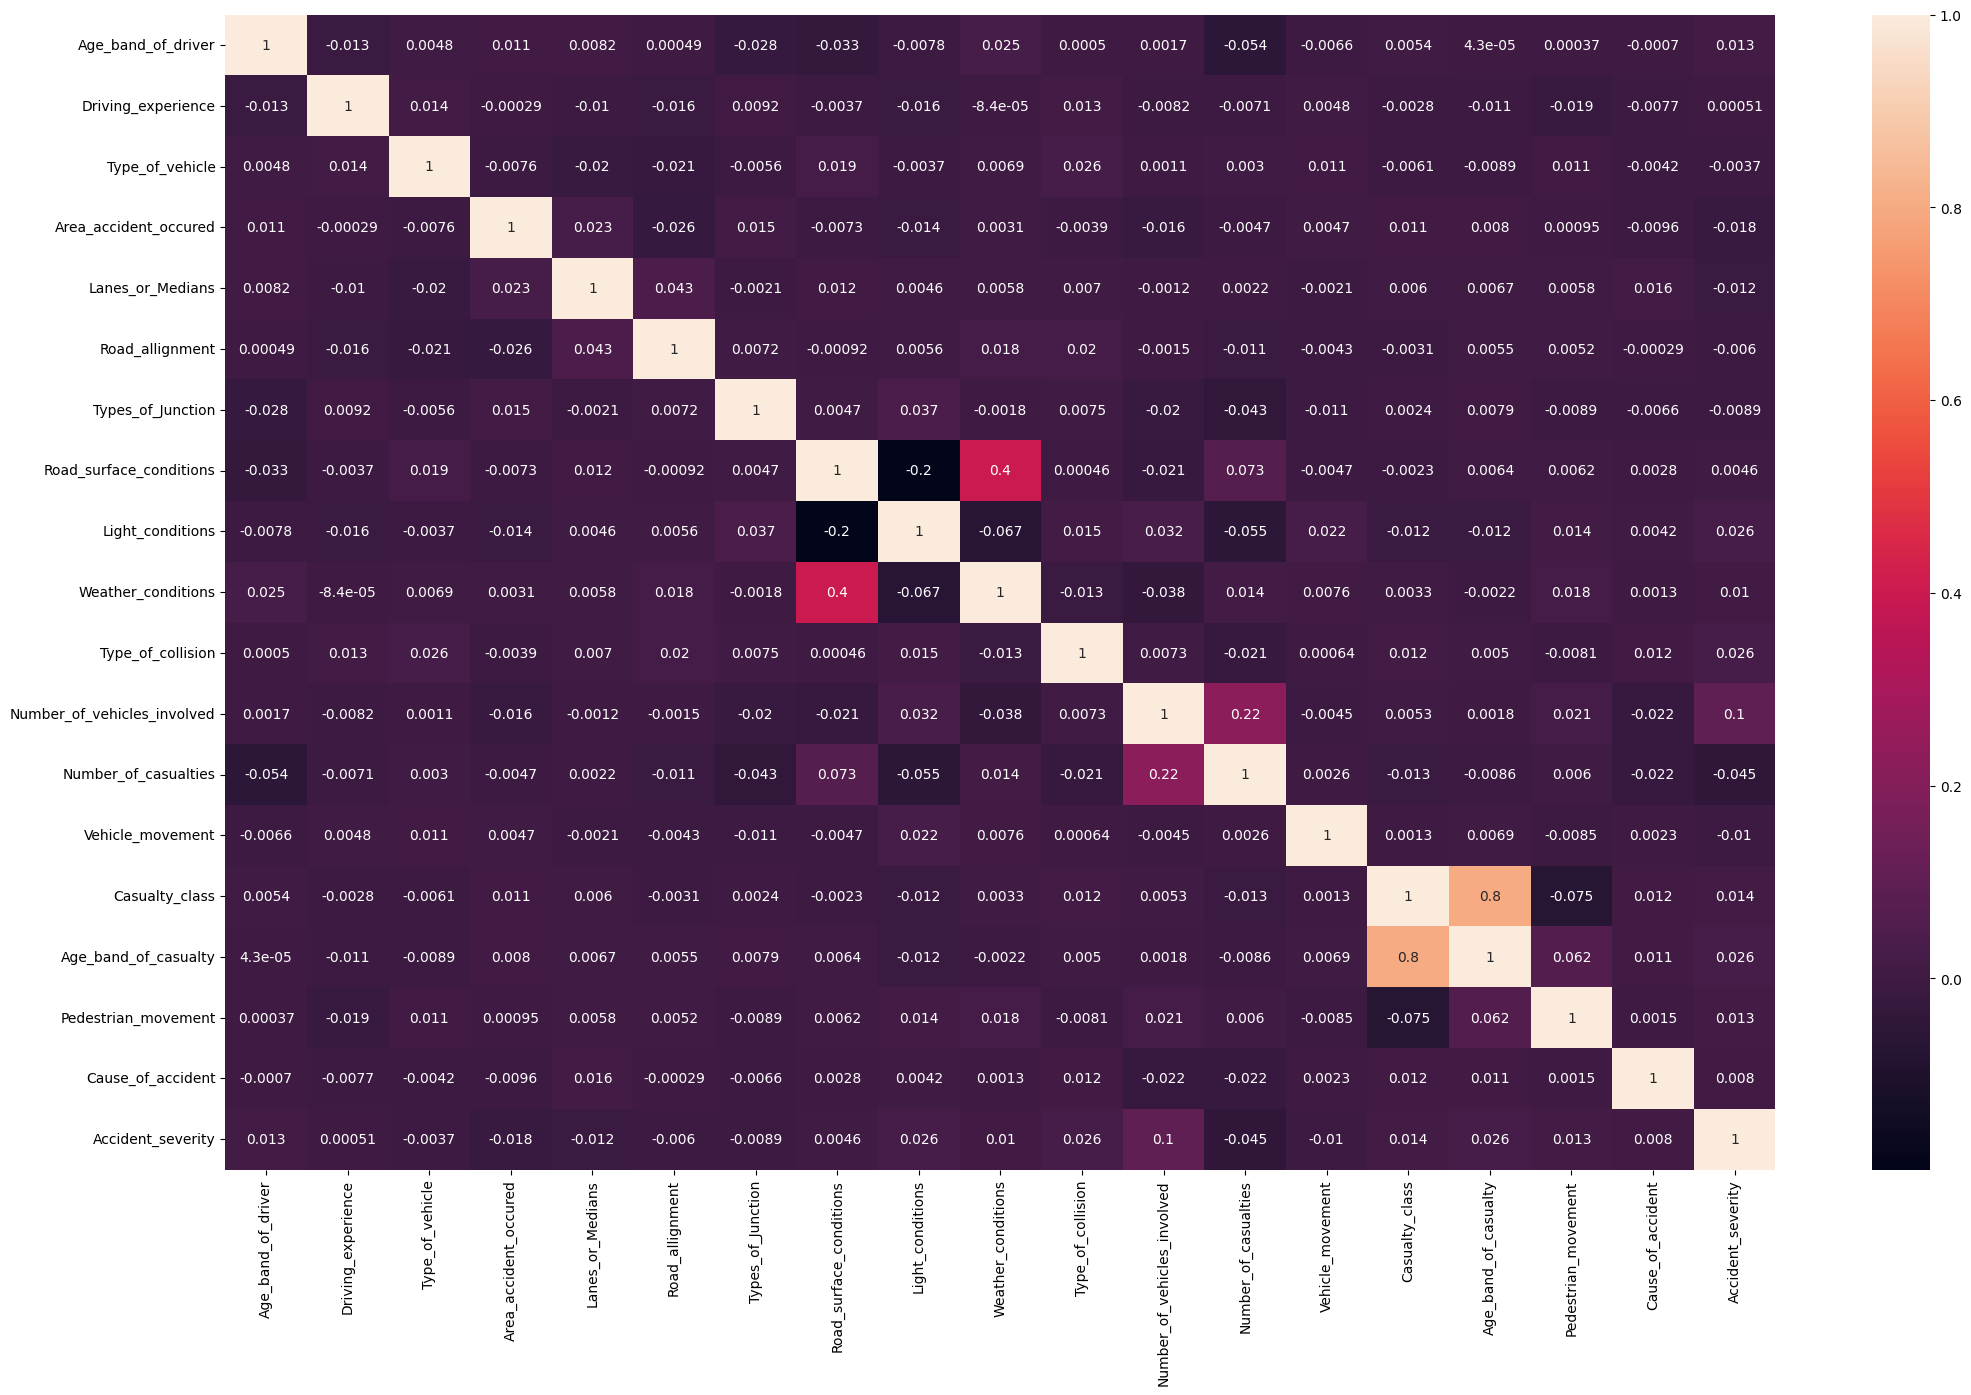

In [21]:
plt.figure(figsize=[25,15])
sns.heatmap(df.corr(),annot=True)

In [22]:
# 2. data 학습 1 (2-1 데이터 분리 test/train)

In [23]:
x = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(8621, 18) (3695, 18) (8621,) (3695,)


In [24]:
counter = Counter(ytrain)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(ytrain)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
xtrain, ytrain = oversample.fit_resample(xtrain, ytrain)

counter = Counter(ytrain)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(ytrain)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", xtrain.shape, ytrain.shape)

Class= 2, n=7324 (84.96%)
Class= 1, n=1191 (13.82%)
Class= 0, n=106 (1.23%)
Class= 2, n=7324 (33.33%)
Class= 1, n=7324 (33.33%)
Class= 0, n=7324 (33.33%)
Upsampled data shape:  (21972, 18) (21972,)


In [25]:
# 2. data 학습 2 (결정트리모델)

In [26]:
dtree = DecisionTreeClassifier()

grid_parameters = {"max_depth": [1, 2, 3],
                   "min_samples_split": [2, 3]
                   }

grid_dtree = GridSearchCV(dtree, param_grid=grid_parameters, cv=3, refit=True)

grid_dtree.fit(xtrain, ytrain)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]})

In [27]:
scores_df = pd.DataFrame(grid_dtree.cv_results_)
print(scores_df)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.016443      0.001243         0.004631        0.000457   
1       0.014720      0.000159         0.003985        0.000074   
2       0.023888      0.002772         0.005786        0.001034   
3       0.022137      0.000848         0.005009        0.001118   
4       0.027040      0.000552         0.005156        0.000674   
5       0.028010      0.001098         0.004252        0.000034   

  param_max_depth param_min_samples_split  \
0               1                       2   
1               1                       3   
2               2                       2   
3               2                       3   
4               3                       2   
5               3                       3   

                                     params  split0_test_score  \
0  {'max_depth': 1, 'min_samples_split': 2}           0.450710   
1  {'max_depth': 1, 'min_samples_split': 3}           0.450710   
2  {'max_depth':

In [28]:
scores_df = scores_df[["params", "mean_test_score", "rank_test_score", "split0_test_score", "split1_test_score", "split2_test_score"]]
print(scores_df)

# 최고의 파라미터 저장해줌
print(f"최적의 파라미터: {grid_dtree.best_params_}")
print(f"최고 정확도: {grid_dtree.best_score_}")

                                     params  mean_test_score  rank_test_score  \
0  {'max_depth': 1, 'min_samples_split': 2}         0.457400                5   
1  {'max_depth': 1, 'min_samples_split': 3}         0.457400                5   
2  {'max_depth': 2, 'min_samples_split': 2}         0.518205                3   
3  {'max_depth': 2, 'min_samples_split': 3}         0.518205                3   
4  {'max_depth': 3, 'min_samples_split': 2}         0.532223                1   
5  {'max_depth': 3, 'min_samples_split': 3}         0.532223                1   

   split0_test_score  split1_test_score  split2_test_score  
0           0.450710           0.461906           0.459585  
1           0.450710           0.461906           0.459585  
2           0.495494           0.534544           0.524577  
3           0.495494           0.534544           0.524577  
4           0.505325           0.552294           0.539050  
5           0.505325           0.552294           0.539050  
최적의 파

In [29]:
# 2. data 학습 3 (결정트리모델)

In [30]:
from sklearn.multiclass import OneVsRestClassifier
models = {
    "LogisticRegression": OneVsRestClassifier(LogisticRegression(C=1.0, solver='liblinear', penalty='l2')),
    "DecisionTreeClassifier": OneVsRestClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)),
    "KNeighborsClassifier": OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5, weights='distance', p=2)),
    "RandomForestClassifier": OneVsRestClassifier(RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=8)),
    "AdaBoostClassifier": OneVsRestClassifier(AdaBoostClassifier(n_estimators=200,learning_rate=0.1)),
    "GradientBoostingClassifier": OneVsRestClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5))
}

def plt_auc(ytest,ypred_proba):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(ytest == i, ypred_proba[:, i])
        #roc_auc[i] = auc(fpr[i], tpr[i])
        roc_auc[i] = roc_auc_score(ytest == i, ypred_proba[:, i])

  
    plt.figure(figsize=(10, 6))
    for i, color in zip(range(3), ['aqua', 'darkorange', 'cornflowerblue']):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

In [31]:
# 3. 모델 평가지표 확인

============================ LogisticRegression ================================
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.00      0.00      0.00       537
           2       0.84      1.00      0.91      3107

    accuracy                           0.84      3695
   macro avg       0.28      0.33      0.30      3695
weighted avg       0.71      0.84      0.77      3695

macro-AUC: 0.6199171501954308
weighted-AUC: 0.5760156650393237 



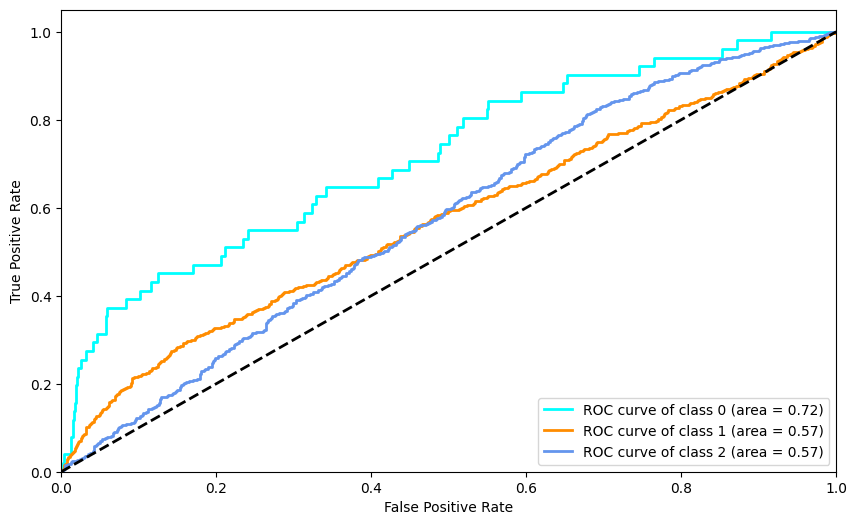

============================ DecisionTreeClassifier ================================
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.33      0.03      0.05       537
           2       0.84      0.99      0.91      3107

    accuracy                           0.84      3695
   macro avg       0.39      0.34      0.32      3695
weighted avg       0.76      0.84      0.77      3695

macro-AUC: 0.6665567092034914
weighted-AUC: 0.614057001091305 



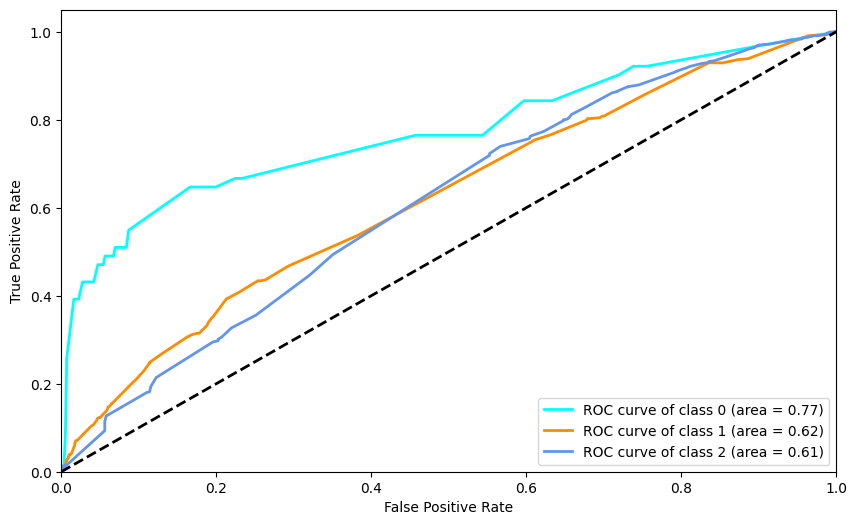

============================ KNeighborsClassifier ================================
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.19      0.02      0.04       537
           2       0.84      0.98      0.91      3107

    accuracy                           0.83      3695
   macro avg       0.34      0.34      0.32      3695
weighted avg       0.73      0.83      0.77      3695

macro-AUC: 0.5538621922748522
weighted-AUC: 0.5484659097605454 



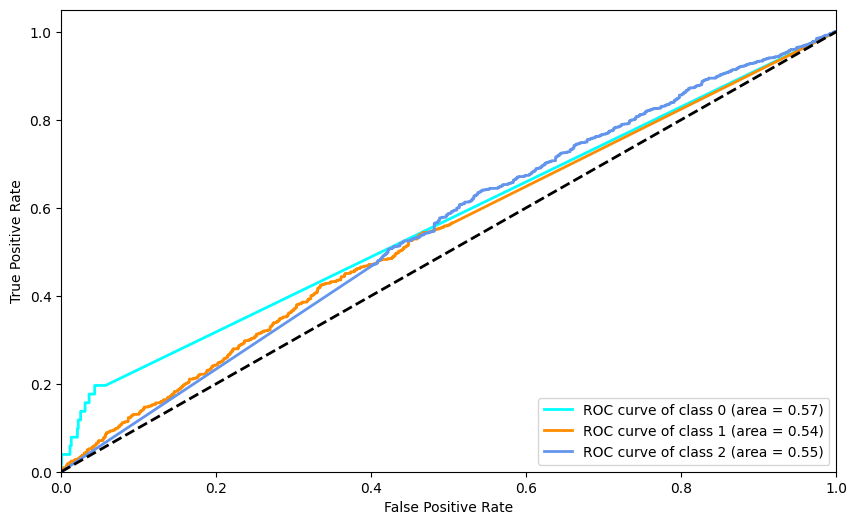

============================ RandomForestClassifier ================================
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       1.00      0.00      0.01       537
           2       0.84      1.00      0.91      3107

    accuracy                           0.84      3695
   macro avg       0.61      0.33      0.31      3695
weighted avg       0.85      0.84      0.77      3695

macro-AUC: 0.6932329422185667
weighted-AUC: 0.6498480944214516 



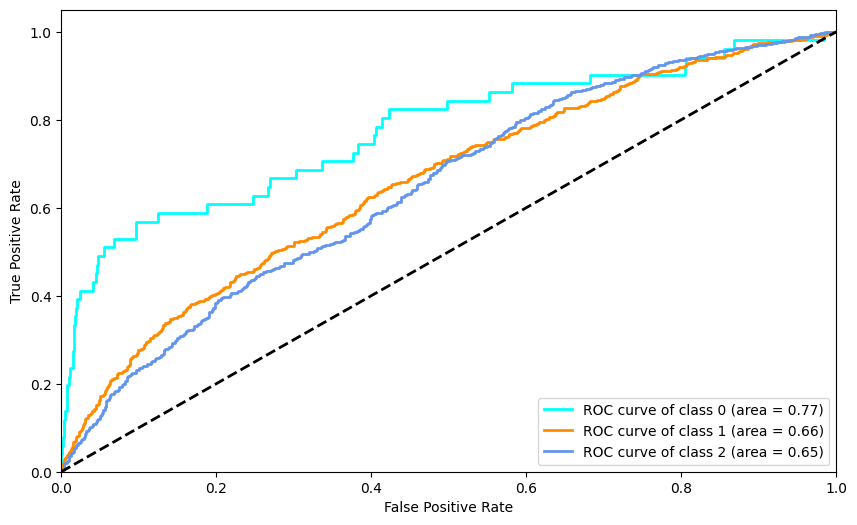

============================ AdaBoostClassifier ================================
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.00      0.00      0.00       537
           2       0.84      1.00      0.91      3107

    accuracy                           0.84      3695
   macro avg       0.28      0.33      0.30      3695
weighted avg       0.71      0.84      0.77      3695

macro-AUC: 0.6571018173708929
weighted-AUC: 0.6059830661187631 



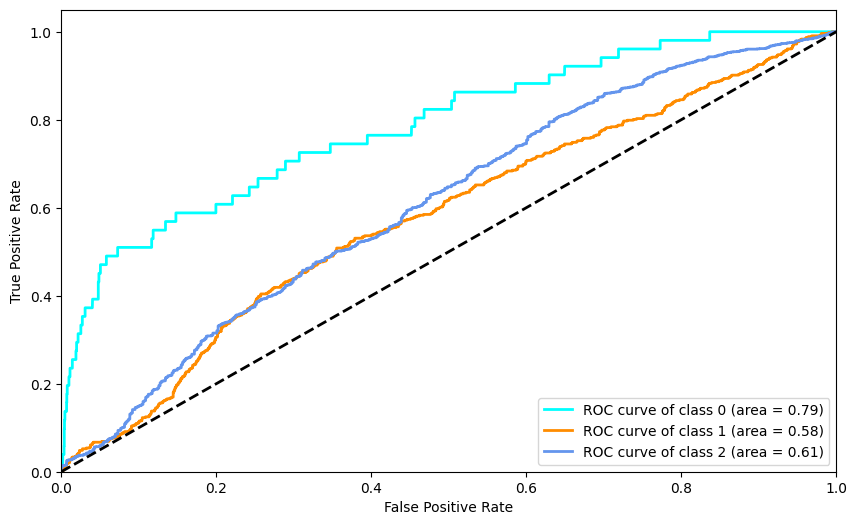

============================ GradientBoostingClassifier ================================
              precision    recall  f1-score   support

           0       0.10      0.02      0.03        51
           1       0.67      0.07      0.12       537
           2       0.85      0.99      0.91      3107

    accuracy                           0.84      3695
   macro avg       0.54      0.36      0.36      3695
weighted avg       0.81      0.84      0.79      3695

macro-AUC: 0.7209778489790507
weighted-AUC: 0.6755525332491518 



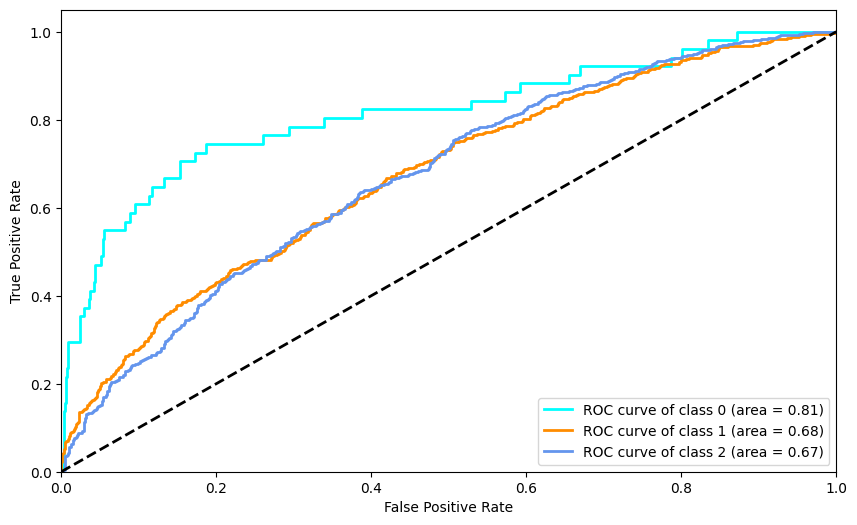

In [32]:
from sklearn.metrics import classification_report
# models,x,y,scaleFlag=0,1,2
def modelAccuracy(models,x,y,scaleFlag):
    #train/Test
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
    acc_result={}
    for name,model in models.items():
        #pipeline
        #1.Transformer -> 2.Model
        print("============================",name,"================================")
        if(scaleFlag==1):
            model_pipeline=Pipeline([('MinMaxScler',MinMaxScaler()),('model',model)])
        elif(scaleFlag==2):
             model_pipeline=Pipeline([('StandardScaler',StandardScaler()),('model',model)])
        else:
            model_pipeline=Pipeline([('model',model)])
        #training/testing on model pipeline
        model_fit=model_pipeline.fit(xtrain,ytrain)
        ypred=model_fit.predict(xtest)
        ypred_proba=model_fit.predict_proba(xtest)
        ypred_proba = np.nan_to_num(ypred_proba, nan=1/3)

        print(classification_report(ytest,ypred))
        auc =  roc_auc_score(ytest, ypred_proba, multi_class='ovr', average='macro')
        print("macro-AUC:",auc)
        auc =  roc_auc_score(ytest, ypred_proba, multi_class='ovr', average='weighted')
        print("weighted-AUC:",auc,"\n")
        plt_auc(ytest,ypred_proba)
        
        #acc_result[name]=acc
    return acc_result

acc=modelAccuracy(models,x,y,1)

In [40]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report
import numpy as np

models = {
    "LogisticRegression": OneVsRestClassifier(LogisticRegression(C=1.0, solver='liblinear', penalty='l2')),
    "DecisionTreeClassifier": OneVsRestClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)),
    "RandomForestClassifier": OneVsRestClassifier(RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=8)),
    "AdaBoostClassifier": OneVsRestClassifier(AdaBoostClassifier(n_estimators=200,learning_rate=0.1)),
    "GradientBoostingClassifier": OneVsRestClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5))
}

# K-fold Cross-Validation 설정
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=0)

for name, model in models.items():
    print(f"================ {name} ================")
    accuracies = []
    for train_index, val_index in kf.split(xtrain): 
        # K-fold의 각 폴드에서 학습 데이터와 검증 데이터를 분리
        x_train_fold, x_val_fold = xtrain, xtest  
        y_train_fold, y_val_fold = ytrain, ytest  
        
        # 모델 학습
        model.fit(x_train_fold, y_train_fold)
        
        # 검증 데이터로 예측
        y_pred = model.predict(x_val_fold)
        
        # 정확도 계산 및 저장
        accuracy = np.mean(y_pred == y_val_fold)
        accuracies.append(accuracy)
    
    # 각 폴드에서의 정확도 평균 및 표준편차 계산
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    
    print(f"Mean Accuracy: {mean_accuracy:.2f} (+/- {std_accuracy:.2f})")
    
    # Test 데이터로 최종 평가
    y_pred_test = model.predict(xtest)
    print(classification_report(ytest, y_pred_test))


================ LogisticRegression ================
Mean Accuracy: 0.54 (+/- 0.00)
              precision    recall  f1-score   support

           0       0.03      0.50      0.06        52
           1       0.19      0.28      0.22       552
           2       0.86      0.59      0.70      3091

    accuracy                           0.54      3695
   macro avg       0.36      0.46      0.33      3695
weighted avg       0.75      0.54      0.62      3695

================ DecisionTreeClassifier ================
Mean Accuracy: 0.53 (+/- 0.00)
              precision    recall  f1-score   support

           0       0.04      0.40      0.07        52
           1       0.19      0.37      0.25       552
           2       0.86      0.57      0.68      3091

    accuracy                           0.53      3695
   macro avg       0.36      0.45      0.33      3695
weighted avg       0.75      0.53      0.61      3695

================ RandomForestClassifier ================
Mean Accu